In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

c:\Users\shash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

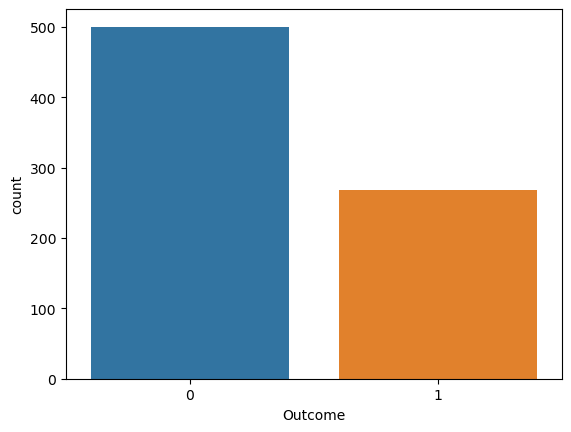

In [8]:
sns.countplot(df['Outcome'])

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
x = df.drop(['Outcome'], axis=1)
x.shape

(768, 8)

In [11]:
y = df['Outcome']
y.shape

(768,)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, test_size=0.1, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((691, 8), (77, 8), (691,), (77,))

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

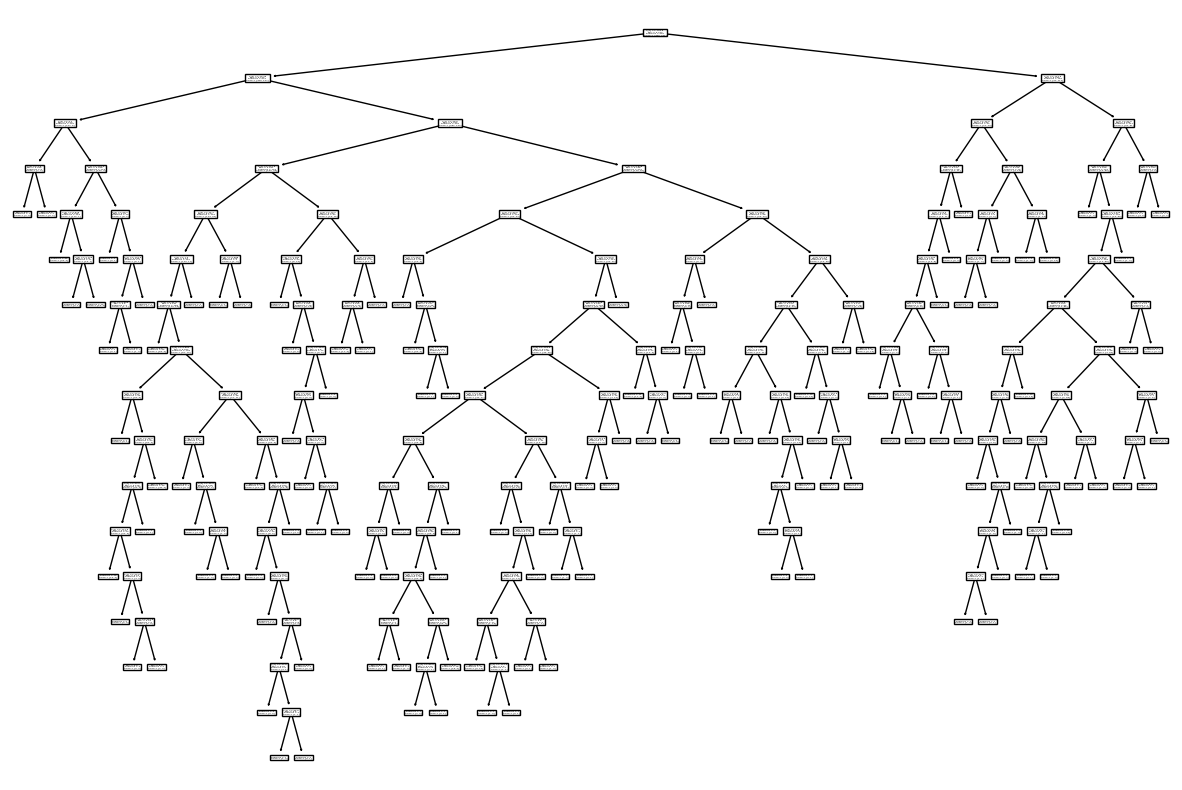

In [14]:
plt.figure(figsize=(15, 10))
plot_tree(dt);

In [17]:
# import graphviz 
# from sklearn import tree
# dot_data = tree.export_graphviz(dt, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("diabetes.pdf") 

In [15]:
dt.score(xtrain, ytrain)

1.0

In [16]:
dt.score(xtest, ytest)

0.7662337662337663

In [22]:
dt_ypred = dt.predict(xtest)

In [23]:
accuracy_score(ytest, dt_ypred)

0.7662337662337663

In [24]:
precision_score(ytest, dt_ypred)

0.6666666666666666

In [25]:
recall_score(ytest, dt_ypred)

0.6666666666666666

In [26]:
f1_score(ytest, dt_ypred)

0.6666666666666666

In [28]:
print(classification_report(ytest, dt_ypred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        50
           1       0.67      0.67      0.67        27

    accuracy                           0.77        77
   macro avg       0.74      0.74      0.74        77
weighted avg       0.77      0.77      0.77        77



In [29]:
confusion_matrix(ytest, dt_ypred)

array([[41,  9],
       [ 9, 18]], dtype=int64)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [18]:
rf.score(xtrain, ytrain)

1.0

In [19]:
rf.score(xtest, ytest)

0.7662337662337663

In [30]:
rf_ypred = rf.predict(xtest)

In [31]:
accuracy_score(ytest, rf_ypred)

0.7662337662337663

In [32]:
precision_score(ytest, rf_ypred)

0.6666666666666666

In [33]:
recall_score(ytest, rf_ypred)

0.6666666666666666

In [34]:
f1_score(ytest, rf_ypred)

0.6666666666666666

In [35]:
print(classification_report(ytest, rf_ypred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        50
           1       0.67      0.67      0.67        27

    accuracy                           0.77        77
   macro avg       0.74      0.74      0.74        77
weighted avg       0.77      0.77      0.77        77



In [36]:
confusion_matrix(ytest, rf_ypred)

array([[41,  9],
       [ 9, 18]], dtype=int64)